### Î¨∏Ïû• Îã®ÏúÑ Ï™ºÍ∞úÍ∏∞



In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

daraz = pd.read_csv("C:\\Users\\rud92\\Machine_learning_Project\\Daraz Online Shopping App.csv")


### Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÌï¥ & ÏÉàÎ°úÏö¥ DF ÎßåÎì§Í∏∞ 
new_rows = []
for idx, row in daraz.iterrows():
    original_row_number = idx

    content_text = row['content']
    score = row['score']
    
    sentences = sent_tokenize(content_text)
    

    for sent in sentences:
        new_rows.append({
            'original_row_number': original_row_number,  
            'sentence': sent.strip(), 
            'score': score
        })

df_sentences = pd.DataFrame(new_rows)



##Ï†ÑÏ≤òÎ¶¨ +ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


##content Ï†ÑÏ≤òÎ¶¨

# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look", "is", "the", "and", "it", "very", "to", "this", "for", "of", "in", "on", "have", "app"})

# Ïñ¥Í∞Ñ, ÌëúÏ†úÏñ¥ Ï∂îÏ∂úÍ∏∞  --> Ïñ¥Í∑ºÏù¥ Ï†úÎåÄÎ°ú Ïïà ÎÇòÏôÄÏÑú PorterStemmerÎùºÎäî Í±∏ Ï∂îÍ∞ÄÎ°ú ÌôúÏö©ÌñàÏñ¥Ïöî!
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess_text(text):
    if not isinstance(text, str):  # NaN Î∞©ÏßÄ
        return ""

    # ÌÅ¥Î†åÏßï
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(text)

    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    tokens = [word for word in tokens if word not in custom_stopwords]

    # Ïñ¥Í∑º Ï∂îÏ∂ú Î∞è ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú(pos ÌÉúÍ∑∏ verbÎ°ú ÏÑ§Ï†ï)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens]

    #Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÍ±∞
    tokens = list(dict.fromkeys(tokens))

    return ' '.join(tokens)


df_sentences['preprocessed_sentence'] = df_sentences['sentence'].apply(preprocess_text)


# ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî

# Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF Í∏∞Î∞òÏùò Î≤°ÌÑ∞Ìôî
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df_sentences.head(6)

##Î¨∏Ïû• Îã®ÏúÑÎ°ú Ïûò ÎÇòÎâ®

original_row_number                                           sentence  \
0                    0  App is now bombarded with ads, making it feel ...   
1                    0             The website really has lost its class.   
2                    0        They charge you for doing cash on delivery.   
3                    0  Ads pop up after every single tap, which is fr...   
4                    0  But I have to give props to their customer ser...   
5                    1  The search is by far the most atrocious aspect...   

   score                              preprocessed_sentence  sentiment_score  
0      3      bombard ad make feel cheap fraudulent website          -0.4939  
1      3                          website really lose class          -0.4576  
2      3                               charge cash delivery           0.0000  
3      3              ad tap frustrate want bombard useless          -0.6705  
4      3               prop customer service delivery whole           0.0000  
5      1  search far atrocious aspect daraz general webs...          -0.3412

#### Ï†ÑÏ≤òÎ¶¨ + ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî

# Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF Í∏∞Î∞òÏùò Î≤°ÌÑ∞Ìôî
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# 2. ÏÑ±Îä• ÎπÑÍµê

# 2.1. ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ Ï∂úÎ†• Ìï®Ïàò
def top_words(vectorizer, X, top_n=30):
    words = vectorizer.get_feature_names_out() # Î≤°ÌÑ∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥†Ïú†Ìïú Îã®Ïñ¥Îì§ÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    word_freq = X.sum(axis=0).A1  # .sum(axis=0)ÏùÄ Í∞Å Îã®Ïñ¥Ïùò Îì±Ïû•ÌöüÏàò Í≥ÑÏÇ∞
                                   # .A1ÏùÄ Ìù¨ÏÜå->Î∞ÄÏßë ÌñâÎ†¨ Î≥ÄÌôò Î©îÏÑúÎìú
    wofr_pair = list(zip(words, word_freq)) # Îã®Ïñ¥-Îì±Ïû•ÌöüÏàò ÌéòÏñ¥ ÎßåÎì§Í∏∞
    wofr_pair = sorted(wofr_pair, key=lambda x: x[1], reverse=True)[:top_n] # ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ nÍ∞ú Ï∂îÏ∂ú
    return wofr_pair
 

# 2.3. TF-IDF ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú
tfidf_top_words = top_words(tfidf_vect, X_train_tfidf)
print("TF-IDFÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥:")
for word, count in tfidf_top_words:
    print(f"{word}: {count}")

TF-IDFÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥:
good: 3646.73262264974
daraz: 2882.2443368528498
shop: 2804.7459151367834
product: 2443.1483360825937
online: 2124.2485117870183
order: 1805.1255101752563
delivery: 1779.1074041752424
best: 1655.8064504746405
service: 1545.543451276159
time: 1419.4992636207428
experience: 1252.7553331044471
bad: 1221.9878054258993
use: 1148.4323048087492
thing: 1113.3170427419182
thank: 1073.1584097136738
quality: 990.4828557463871
get: 978.7683767215239
like: 962.2744003784942
love: 961.9346580184036
nice: 942.7257962946217
item: 940.523538288034
easy: 940.2207728737648
dont: 930.7655034755039
great: 886.395701070555
much: 814.4872834732562
worst: 804.5603530102925
customer: 779.0814402626331
charge: 764.7331467887275
show: 756.7227343185821
work: 755.1892145267415


#### Ïò§Î≤ÑÏÉòÌîåÎßÅ

Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùò Í≤ΩÏö∞ Î≥ÑÏ†ê ÎÇ¥Ïö© ÎïåÎ¨∏Ïóê ÎèÑÏûÖÌïú ÎÇ¥Ïö©Ïù¥ÏóàÎäîÎç∞, Î¨∏Ïû• Îã®ÏúÑ Î∂ÑÎ•ò ÌõÑ Í∞êÏÑ± Î∂ÑÏÑù Ï†êÏàòÎ•º ÌôïÏù∏ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî Î≥ÑÏ†ê Ï†ïÎ≥¥Î•º Íº≠ ÏÇ¨Ïö©Ìï¥Ïïº Ìï†Íπå...? 
Î≥ÑÏ†ê Ï†ïÎ≥¥Îäî Í∞êÏÑ± Ï†êÏàòÎûë ÎπÑÍµêÌï¥ÏÑú Î≥¥Îäî Í≥ºÏ†ïÏù¥ ÏûàÏúºÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏÑú ÎÑ£ÏóàÏùå.
Í∑∏Îü¨ÎÇò Îî±Ìûà Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏïÑ ÏÉùÎûµÌñàÏùå

#### Í∞êÏÑ± Î∂ÑÏÑù 

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

## nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_sentences['sentiment_score'] = df_sentences['preprocessed_sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df_sentences[['preprocessed_sentence', 'sentiment_score']])

                               preprocessed_sentence  sentiment_score
0      bombard ad make feel cheap fraudulent website          -0.4939
1                          website really lose class          -0.4576
2                               charge cash delivery           0.0000
3              ad tap frustrate want bombard useless          -0.6705
4               prop customer service delivery whole           0.0000
...                                              ...              ...
96689                                       easy use           0.4404
96690                                           love           0.6369
96691     helpful thankyou thankful team daraz happy           0.8807
96692                            easy wasy shop home           0.4404
96693                                   amaze unique           0.5423

[96694 rows x 2 columns]


In [13]:
df_sentences

original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score                          preprocessed_sentence  sentiment_score  
0          3  bombard ad make feel cheap fraudulent website          -0.4939  
1          3                      website really lose class          -0.4576  
2          3                           charge cash delivery           0.0000  
3          3          ad tap frustrate want bombard useless          -0.6705  
4          3           prop customer service delivery whole           0.0000  
...      ...                                            ...              ...  
96689      5                                       easy use           0.4404  
96690      5                                           love           0.6369  
96691      5     helpful thankyou thankful team daraz happy           0.8807  
96692      4                            easy wasy shop home           0.4404  
96693      5                                   amaze unique           0.5423  

[96694 rows x 5 columns]

   original_row_number  avg_sentiment_score  score
0                    0            -0.324400      3
1                    1            -0.132225      1
2                    2             0.032800      1
3                    3            -0.154888      3
4                    4            -0.146529      1


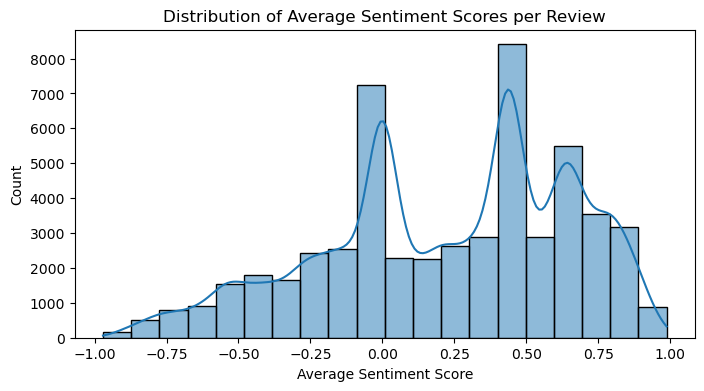

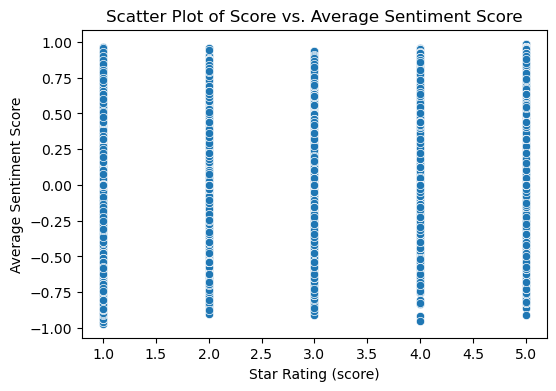

Correlation between star rating and average sentiment score: 0.6743


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_review_sentiment = (
    df_sentences
    .groupby('original_row_number')['sentiment_score']
    .mean()
    .to_frame('avg_sentiment_score')  
)

df_review_sentiment = df_review_sentiment.join(daraz['score'])

df_review_sentiment.reset_index(inplace=True)

print(df_review_sentiment.head())


# Î¶¨Î∑∞Î≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàòÏôÄ Î≥ÑÏ†ê
plt.figure(figsize=(8,4))
sns.histplot(df_review_sentiment['avg_sentiment_score'], kde=True, bins=20)
plt.title('Distribution of Average Sentiment Scores per Review')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Count')
plt.show()

# Î≥ÑÏ†ê, ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò Í∞ÑÏùò Í¥ÄÍ≥Ñ
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_review_sentiment, x='score', y='avg_sentiment_score')
plt.title('Scatter Plot of Score vs. Average Sentiment Score')
plt.xlabel('Star Rating (score)')
plt.ylabel('Average Sentiment Score')
plt.show()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò
corr_value = df_review_sentiment['score'].corr(df_review_sentiment['avg_sentiment_score'])
print(f"Correlation between star rating and average sentiment score: {corr_value:.4f}")

### 5Ï∞® ÌöåÏùò ÏûêÎ£å 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


## nltk.download('punkt_tab')

daraz2 = pd.read_csv(r"C:\Users\rud92\Machine_learning_Project\Daraz Online Shopping App.csv")

## ÏπºÎüº Ï†ïÎ¶¨
daraz2 = daraz.drop(columns=['reviewId', 'replyContent', 'repliedAt', 'at'])

def assign_category(x):
    if x == 0:
        return 0
    elif 1 <= x <= 5:
        return 1
    elif 5 < x <= 10:
        return 2
    elif 11 <= x <= 50:
        return 3
    elif 51 <= x <= 100:
        return 4
    else:
        return 5

daraz2['category'] = daraz2['thumbsUpCount'].apply(assign_category)

##content Ï†ÑÏ≤òÎ¶¨

# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look"})

# Ïñ¥Í∞Ñ, ÌëúÏ†úÏñ¥ Ï∂îÏ∂úÍ∏∞  --> Ïñ¥Í∑ºÏù¥ Ï†úÎåÄÎ°ú Ïïà ÎÇòÏôÄÏÑú PorterStemmerÎùºÎäî Í±∏ Ï∂îÍ∞ÄÎ°ú ÌôúÏö©ÌñàÏñ¥Ïöî!
lemmatizer2 = WordNetLemmatizer()
stemmer2 = PorterStemmer()

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess_text(text):
    if not isinstance(text, str):  # NaN Î∞©ÏßÄ
        return ""

    # ÌÅ¥Î†åÏßï
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # ÌÜ†ÌÅ∞Ìôî
    tokens2 = word_tokenize(text)

    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    tokens2 = [word for word in tokens2 if word not in custom_stopwords]

    # Ïñ¥Í∑º Ï∂îÏ∂ú Î∞è ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú(pos ÌÉúÍ∑∏ verbÎ°ú ÏÑ§Ï†ï)
    tokens2 = [lemmatizer2.lemmatize(word) for word in tokens2]
    tokens2 = [lemmatizer2.lemmatize(word, pos="v") for word in tokens2]

    #Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÍ±∞
    tokens2 = list(dict.fromkeys(tokens2))

    return ' '.join(tokens2)

daraz2['content'] = daraz2['content'].apply(preprocess_text)



# ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî

# Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF Í∏∞Î∞òÏùò Î≤°ÌÑ∞Ìôî
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

In [21]:
daraz2.head

<bound method NDFrame.head of                                                  content  score  \
0      app bombard ad make feel cheap fraudulent webs...      3   
1      search far atrocious aspect app daraz general ...      1   
2      recently experience service would like provide...      1   
3      much ad notification option disable device sys...      3   
4      update redesign even uglier front end still bu...      1   
...                                                  ...    ...   
53995  wow great ecommerce site bangladesh thank much...      5   
53996                                  easy use love app      5   
53997         helpful thankyou thankful team daraz happy      5   
53998                                easy wasy shop home      4   
53999                                   amaze unique app      5   

       thumbsUpCount                    appName  category  
0                 37  Daraz Online Shopping App         3  
1                142  Daraz Online Shopping A

In [23]:
# ÌîºÏ≤òÎ≤°ÌÑ∞Ìôî

# Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF Í∏∞Î∞òÏùò Î≤°ÌÑ∞Ìôî
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

In [25]:
#Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞(ÌèâÏ†ê 1~2) ÌïÑÌÑ∞ÎßÅ
negative_reviews = daraz2[daraz2['score'] <= 2]['content'].dropna()

# ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ (LDA Ï†ÅÏö©)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = count_vectorizer.fit_transform(negative_reviews)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Ï∂úÎ†•
print("\nÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:")
words = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nüìå Topic {topic_idx + 1}:")
    print(", ".join([words[i] for i in topic.argsort()[:-11:-1]]))


ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:

üìå Topic 1:
service, daraz, customer, order, delivery, worst, day, online, time, shop

üìå Topic 2:
product, order, app, bad, quality, daraz, time, dont, fake, thing

üìå Topic 3:
app, product, good, update, slow, daraz, search, like, new, bad

üìå Topic 4:
app, work, order, problem, daraz, try, time, use, say, fix

üìå Topic 5:
delivery, charge, price, product, daraz, high, cash, pay, point, item


In [27]:
!pip install textblob

## Í∞êÏ†ï Î∂ÑÏÑù ÏàòÌñâ Î∞è Í∞êÏ†ï Ï†êÏàò Ìè¨Ìï®
from textblob import TextBlob

# Í∞êÏ†ï Î∂ÑÏÑù Ï†êÏàò Í≥ÑÏÇ∞ (TextBlob ÌôúÏö©)
daraz2['sentiment_score'] = daraz2['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Í∞êÏ†ï Î∂ÑÎ•ò Ìï®Ïàò
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

daraz2['sentiment'] = daraz2['sentiment_score'].apply(categorize_sentiment)

# Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
print(daraz2[['content', 'sentiment_score', 'sentiment']].head())

                                             content  sentiment_score  \
0  app bombard ad make feel cheap fraudulent webs...         0.075000   
1  search far atrocious aspect app daraz general ...         0.040833   
2  recently experience service would like provide...        -0.333333   
3  much ad notification option disable device sys...        -0.100000   
4  update redesign even uglier front end still bu...         0.059375   

  sentiment  
0   Neutral  
1   Neutral  
2  Negative  
3   Neutral  
4   Neutral  


In [29]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [31]:
print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score
0                        0            -0.324400      3
1                        1            -0.132225      1
2                        2             0.032800      1
3                        3            -0.154888      3
4                        4            -0.146529      1
...                    ...                  ...    ...
53995                53995             0.443000      5
53996                53996             0.538650      5
53997                53997             0.880700      5
53998                53998             0.440400      4
53999                53999             0.542300      5

[54000 rows x 3 columns]


In [33]:
import pandas as pd
import numpy as np

def assign_sentiment_label(score):
    if score <= -0.1:
        return "Negative"
    elif score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_sentences['sentiment_label'] = df_sentences['sentiment_score'].apply(assign_sentiment_label)

In [35]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [37]:
sentiment_counts = df_sentences.groupby('original_row_number')['sentiment_label'].value_counts().unstack(fill_value=0)
sentiment_counts['total_sentences'] = sentiment_counts.sum(axis=1)


sentiment_counts['negative_ratio'] = sentiment_counts['Negative'] / sentiment_counts['total_sentences']
sentiment_counts['neutral_ratio'] = sentiment_counts['Neutral'] / sentiment_counts['total_sentences']
sentiment_counts['positive_ratio'] = sentiment_counts['Positive'] / sentiment_counts['total_sentences']

print(sentiment_counts)

sentiment_label      Negative  Neutral  Positive  total_sentences  \
original_row_number                                                 
0                           3        2         0                5   
1                           3        0         1                4   
2                           1        1         1                3   
3                           2        6         0                8   
4                           3        2         2                7   
...                       ...      ...       ...              ...   
53995                       0        1         1                2   
53996                       0        0         2                2   
53997                       0        0         1                1   
53998                       0        0         1                1   
53999                       0        0         1                1   

sentiment_label      negative_ratio  neutral_ratio  positive_ratio  
original_row_number              

In [39]:
# sentiment_countsÏùò ÌïÑÏöîÌïú ÏπºÎüºÎßå ÏÑ†ÌÉù (ÎπÑÏú® ÏπºÎüº)
sentiment_ratios = sentiment_counts[['negative_ratio', 'neutral_ratio', 'positive_ratio']].reset_index()

print(sentiment_ratios)

sentiment_label  original_row_number  negative_ratio  neutral_ratio  \
0                                  0        0.600000       0.400000   
1                                  1        0.750000       0.000000   
2                                  2        0.333333       0.333333   
3                                  3        0.250000       0.750000   
4                                  4        0.428571       0.285714   
...                              ...             ...            ...   
53995                          53995        0.000000       0.500000   
53996                          53996        0.000000       0.000000   
53997                          53997        0.000000       0.000000   
53998                          53998        0.000000       0.000000   
53999                          53999        0.000000       0.000000   

sentiment_label  positive_ratio  
0                      0.000000  
1                      0.250000  
2                      0.333333  
3          

In [41]:
# df_review_sentimentÏôÄ merge
df_review_sentiment = df_review_sentiment.merge(sentiment_ratios, on='original_row_number', how='left')

print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio  
0           0.400000        0.000000  
1           0.000000        0.250

In [43]:
def assign_review_sentiment(avg_score):
    if avg_score <= -0.1:
        return "Negative"
    elif avg_score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_review_sentiment['sentiment_label'] = df_review_sentiment['avg_sentiment_score'].apply(assign_review_sentiment)

In [49]:
df_review_sentiment.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
0           0.400000      

In [51]:
positive_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Positive']

print(positive_reviews.head())
print("Í∏çÏ†ï Î¶¨Î∑∞ Ïàò:", len(positive_reviews))

    original_row_number  avg_sentiment_score  score  negative_ratio  \
8                     8             0.418125      5        0.250000   
12                   12             0.522180      5        0.000000   
16                   16             0.190633      1        0.000000   
18                   18             0.271400      3        0.200000   
19                   19             0.224617      4        0.333333   

    neutral_ratio  positive_ratio sentiment_label  
8        0.000000        0.750000        Positive  
12       0.200000        0.800000        Positive  
16       0.666667        0.333333        Positive  
18       0.400000        0.400000        Positive  
19       0.166667        0.500000        Positive  
Í∏çÏ†ï Î¶¨Î∑∞ Ïàò: 32415


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda

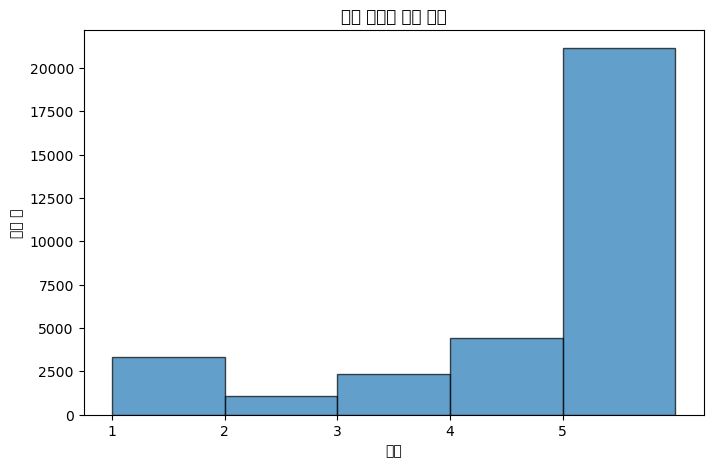

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(positive_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('Î≥ÑÏ†ê')
plt.ylabel('Î¶¨Î∑∞ Ïàò')
plt.title('Í∏çÏ†ï Î¶¨Î∑∞Ïùò Î≥ÑÏ†ê Î∂ÑÌè¨')
plt.xticks(range(1, 6))
plt.show()

In [55]:
negative_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Negative']
neutral_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Neutral']

print("Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò:", len(negative_reviews))
print("Ï§ëÎ¶Ω Î¶¨Î∑∞ Ïàò:", len(neutral_reviews))

Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò: 12124
Ï§ëÎ¶Ω Î¶¨Î∑∞ Ïàò: 9461


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\L

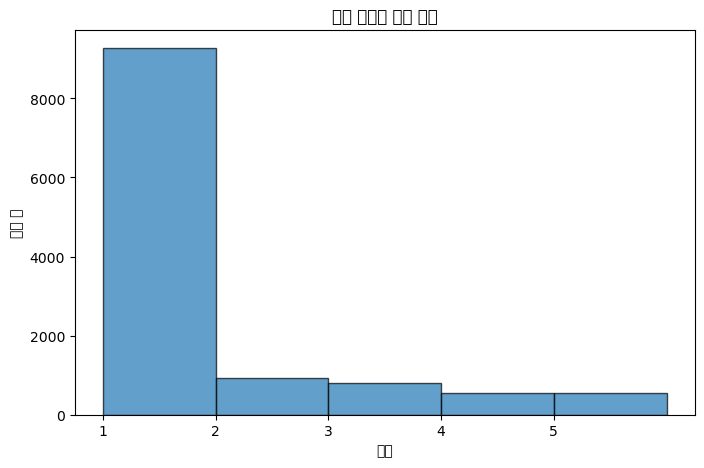

In [57]:
plt.figure(figsize=(8, 5))
plt.hist(negative_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('Î≥ÑÏ†ê')
plt.ylabel('Î¶¨Î∑∞ Ïàò')
plt.title('Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Î≥ÑÏ†ê Î∂ÑÌè¨')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\L

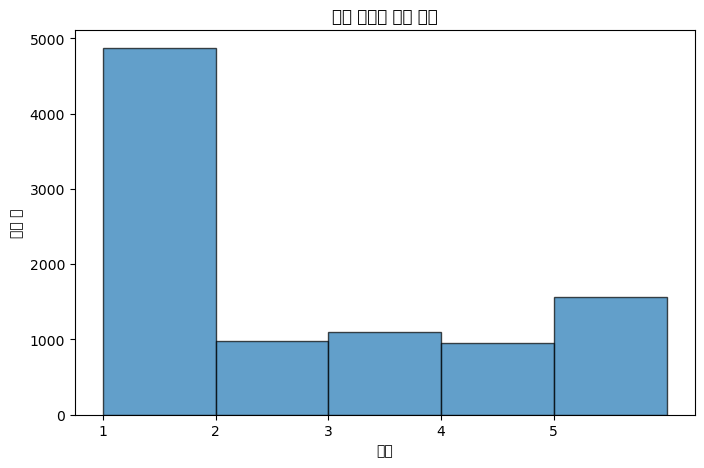

In [59]:
plt.figure(figsize=(8, 5))
plt.hist(neutral_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('Î≥ÑÏ†ê')
plt.ylabel('Î¶¨Î∑∞ Ïàò')
plt.title('Ï§ëÎ¶Ω Î¶¨Î∑∞Ïùò Î≥ÑÏ†ê Î∂ÑÌè¨')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)


             word  frequency
824           app      15646
6219         good      12892
3563        daraz       9152
13166        shop       8925
11396     product       6392
10083      online       6055
1819         best       5163
3962     delivery       4052
10208       order       3924
14735        time       3029
14561       thing       3026
12972     service       2855
8512         like       2799
4755         easy       2605
15406         use       2570
8694         love       2437
9719         nice       2392
14422       thank       2366
5263   experience       2325
6360        great       2318


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  plt.tight_layout()

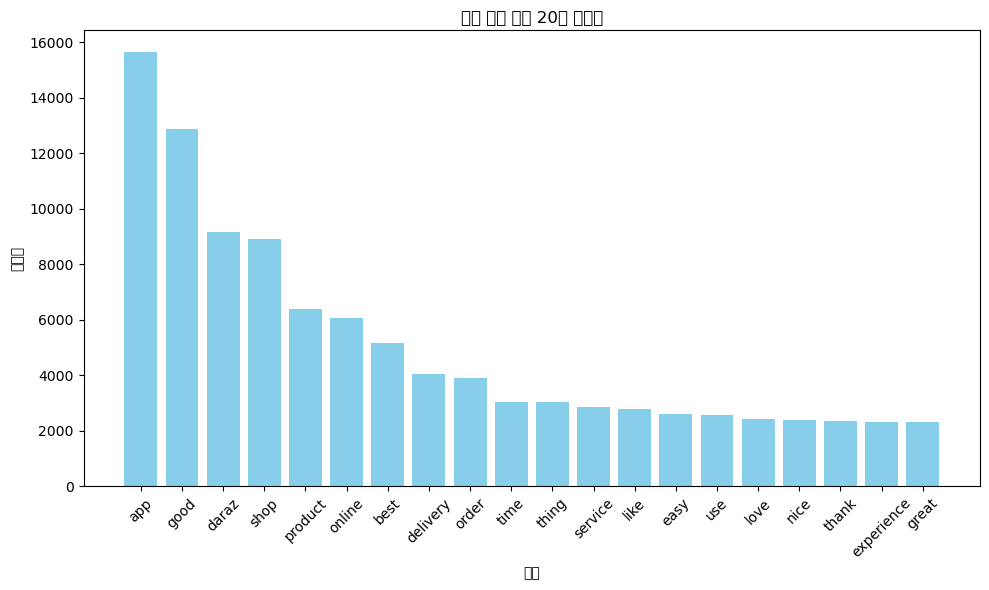

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


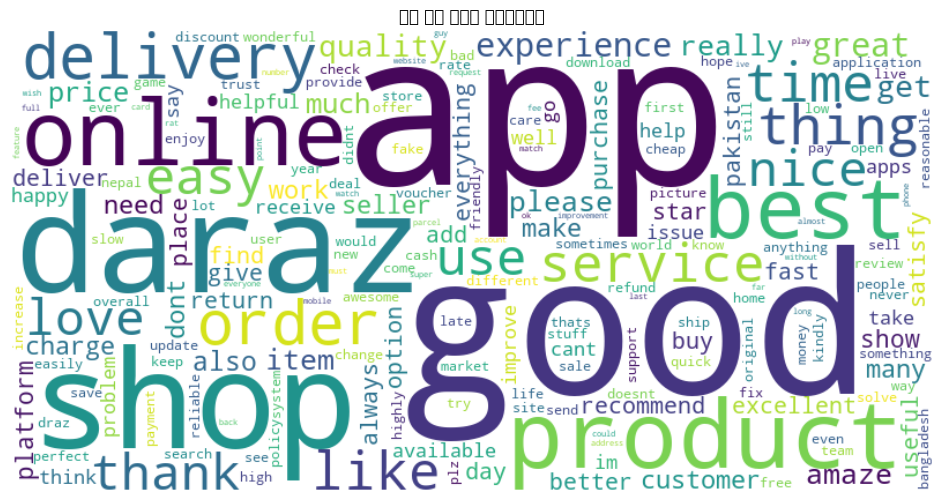

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_sentences2 = pd.DataFrame(new_rows)

positive_review_ids = positive_reviews['original_row_number'].unique()
positive_sentences = df_sentences2[df_sentences2['original_row_number'].isin(positive_review_ids)]

positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)

# ÌîºÏ≤ò Î≤°ÌÑ∞Ìôî ÏßÑÌñâ
vectorizer = CountVectorizer()
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_positive.sum(axis=0).A1  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print(word_freq_df.head(20))

# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('ÎπàÎèÑÏàò')
plt.xticks(rotation=45)
plt.title('Í∏çÏ†ï Î¶¨Î∑∞ ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú')
plt.tight_layout()
plt.show()

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud

word_freq_dict = dict(zip(word_freq_df['word'], word_freq_df['frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Í∏çÏ†ï Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
plt.show()

In [65]:
# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìúÎ•º Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú (Ïù¥ÎØ∏ word_freq_dfÏóêÏÑú Ï†ïÎ†¨Îêú ÏÉÅÌÉú)
top_keywords = word_freq_df.head(20)['word'].tolist()

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìúÍ∞Ä Î¨∏Ïû•Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ Ï≤¥ÌÅ¨ÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def contains_any_keyword(text, keywords):
    # Îã®ÏàúÌïú Î¨∏ÏûêÏó¥ Í≤ÄÏÉâ: ÎßåÏïΩ ÏÜåÎ¨∏ÏûêÎ°ú Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏ÎùºÎ©¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    return any(keyword in text for keyword in keywords)

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¨∏Ïû•ÏùÑ ÌïÑÌÑ∞ÎßÅ
sentences_with_keywords = positive_sentences[positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Î¨∏Ïû•ÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÎ†§Î©¥, ÏúÑ Í≤∞Í≥ºÏùò Î∞òÎåÄÎ•º ÏÇ¨Ïö©
sentences_without_keywords = positive_sentences[~positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# Í≤∞Í≥º ÌôïÏù∏
print('Í∏çÏ†ï Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ')
print("ÌÇ§ÏõåÎìú Ìè¨Ìï® Î¨∏Ïû• Ïàò:", len(sentences_with_keywords))
print("ÌÇ§ÏõåÎìú ÎØ∏Ìè¨Ìï® Î¨∏Ïû• Ïàò:", len(sentences_without_keywords))

Í∏çÏ†ï Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ
ÌÇ§ÏõåÎìú Ìè¨Ìï® Î¨∏Ïû• Ïàò: 42549
ÌÇ§ÏõåÎìú ÎØ∏Ìè¨Ìï® Î¨∏Ïû• Ïàò: 6837


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)


             word  frequency
570           app       4752
2568        daraz       3915
8561      product       3868
7694        order       3802
990           bad       3068
11005        time       2313
2856     delivery       2237
12118       worst       2008
9788      service       1947
3326         dont       1844
4551          get       1520
3886   experience       1449
4022         fake       1312
5631         item       1275
2469     customer       1225
8810      quality       1205
9993         show       1186
9288       return       1184
11549         use       1165
9941         shop       1126


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
C:

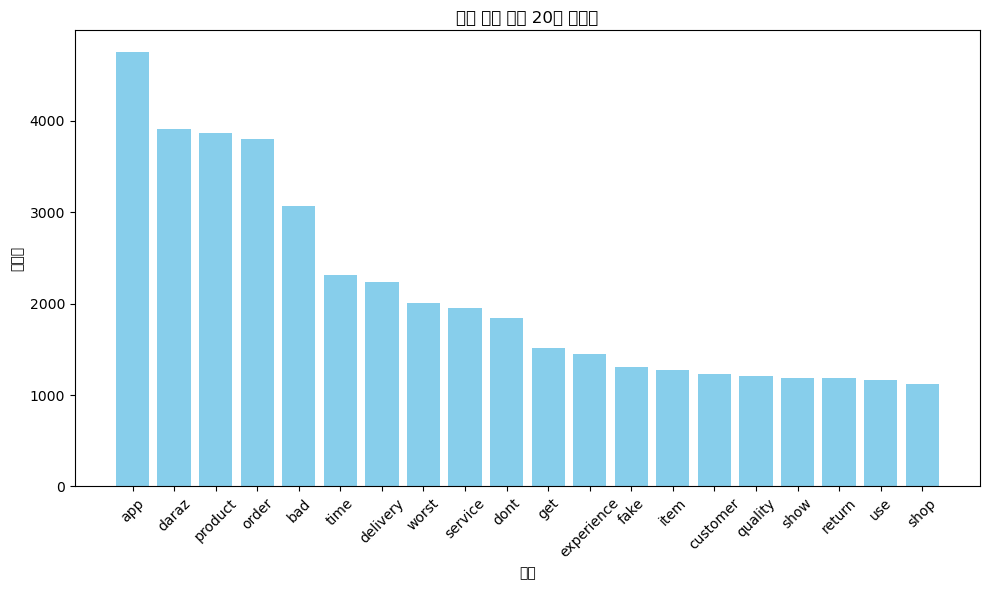

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


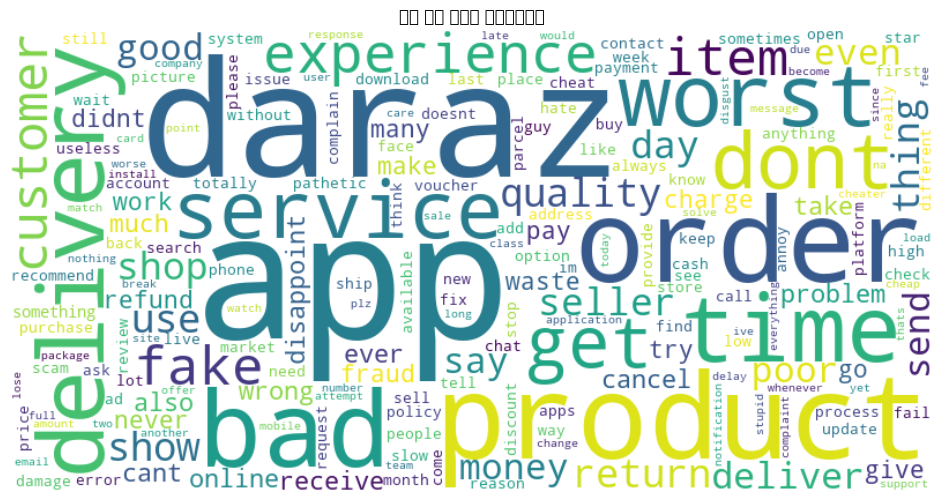

In [67]:
df_sentences2 = pd.DataFrame(new_rows)

negative_review_ids = negative_reviews['original_row_number'].unique()
negative_sentences = df_sentences2[df_sentences2['original_row_number'].isin(negative_review_ids)]

negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)

# ÌîºÏ≤ò Î≤°ÌÑ∞Ìôî ÏßÑÌñâ
vectorizer2 = CountVectorizer()
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_negative.sum(axis=0).A1  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

vocab2 = vectorizer2.get_feature_names_out()

word_freq_df2 = pd.DataFrame({'word': vocab2, 'frequency': word_counts})
word_freq_df2 = word_freq_df2.sort_values(by='frequency', ascending=False)

print(word_freq_df2.head(20))

# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df2['word'].head(20), word_freq_df2['frequency'].head(20), color='skyblue')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('ÎπàÎèÑÏàò')
plt.xticks(rotation=45)
plt.title('Î∂ÄÏ†ï Î¶¨Î∑∞ ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú')
plt.tight_layout()
plt.show()

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud

word_freq_dict2 = dict(zip(word_freq_df2['word'], word_freq_df2['frequency']))

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict2)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Î∂ÄÏ†ï Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)


           word  frequency
446         app       3361
2150      daraz       2774
7087    product       2762
6360      order       2411
2356   delivery       2041
9104       time       1498
3810       good       1160
3737        get       1022
4651       item       1015
8249       show       1008
2738       dont       1004
1549     charge        995
8213       shop        897
8094    service        888
9570        use        881
10011      work        806
9025      thing        773
2074   customer        751
2209        day        694
8044     seller        677


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Use

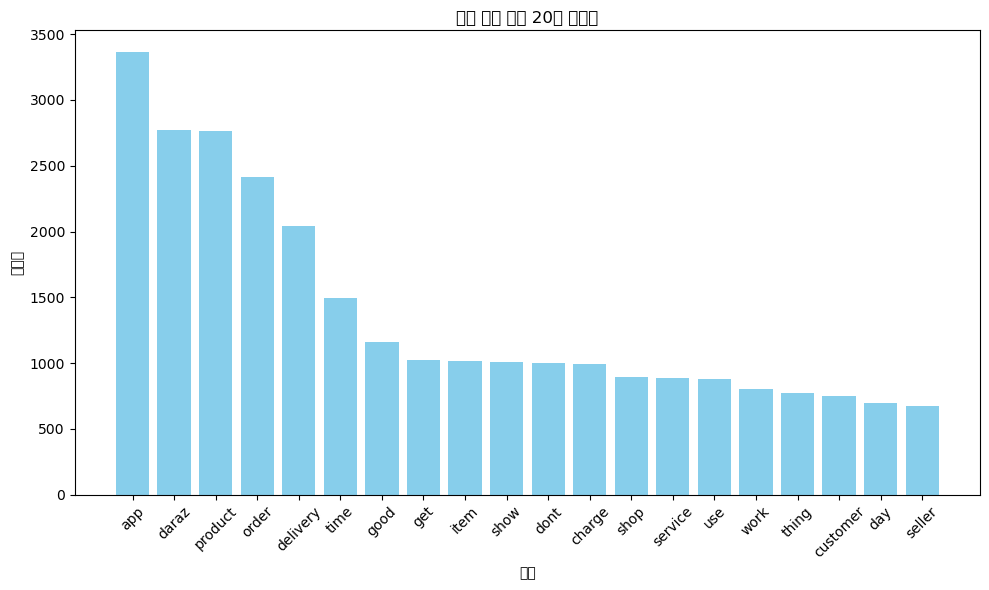

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


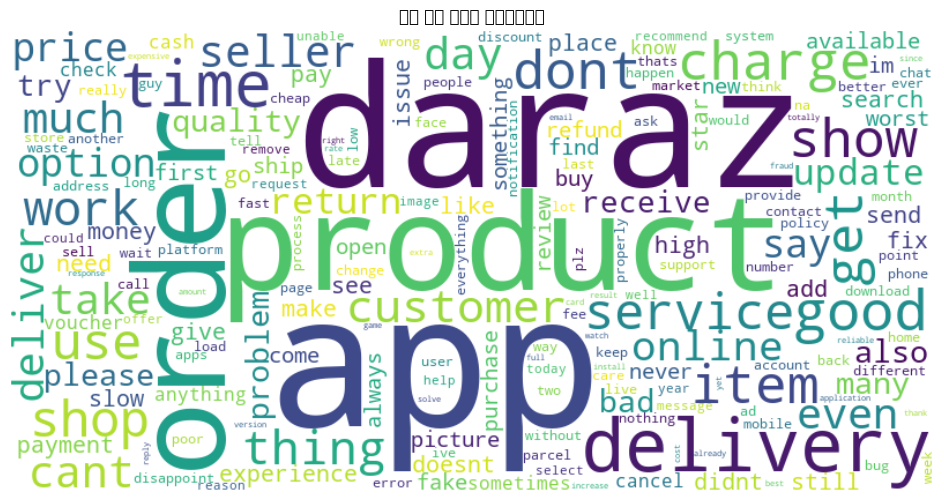

In [69]:
df_sentences2 = pd.DataFrame(new_rows)

neutral_review_ids = neutral_reviews['original_row_number'].unique()
neutral_sentences = df_sentences2[df_sentences2['original_row_number'].isin(neutral_review_ids)]

neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)

# ÌîºÏ≤ò Î≤°ÌÑ∞Ìôî ÏßÑÌñâ
vectorizer3 = CountVectorizer()
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])


import numpy as np

word_counts3 = X_neutral.sum(axis=0).A1  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

vocab3 = vectorizer3.get_feature_names_out()

word_freq_df3 = pd.DataFrame({'word': vocab3, 'frequency': word_counts3})
word_freq_df3 = word_freq_df3.sort_values(by='frequency', ascending=False)

print(word_freq_df3.head(20))

# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú

plt.figure(figsize=(10,6))
plt.bar(word_freq_df3['word'].head(20), word_freq_df3['frequency'].head(20), color='skyblue')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('ÎπàÎèÑÏàò')
plt.xticks(rotation=45)
plt.title('Ï§ëÎ¶Ω Î¶¨Î∑∞ ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú')
plt.tight_layout()
plt.show()

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud

word_freq_dict3 = dict(zip(word_freq_df3['word'], word_freq_df3['frequency']))

wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict3)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Î∂ÄÏ†ï Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
plt.show()

In [ ]:
## ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ 

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÖçÏä§Ìä∏Î•º ÌñâÎ†¨Î°ú Î≥ÄÌôò
# max_df, min_df, stop_words Îì±Ïùò ÌååÎùºÎØ∏ÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±Ïóê ÎßûÍ≤å Ï°∞Ï†ï Í∞ÄÎä•Ìï©ÎãàÎã§.
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])

# LDA Î™®Îç∏ ÌïôÏäµ
# n_componentsÎäî ÌÜ†ÌîΩÏùò Í∞úÏàò, Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÏ∂∞ Ï°∞Ï†ï
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(X_positive)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: app shop online good best daraz amaze platform product pakistan
Topic 1: delivery app good charge time like fast order need work
Topic 2: product good order service quality time seller daraz customer item
Topic 3: app easy love daraz use experience great good shop thing
Topic 4: daraz thank nice app product satisfy purchase make money return


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÖçÏä§Ìä∏Î•º ÌñâÎ†¨Î°ú Î≥ÄÌôò
vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])

# LDA Î™®Îç∏ ÌïôÏäµ
n_topics = 5
lda_model2 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics2 = lda_model2.fit_transform(X_negative)

no_top_words = 10
feature_names2 = vectorizer2.get_feature_names_out()
display_topics(lda_model2, feature_names2, no_top_words)

Topic 0: order product deliver item return cancel delivery seller daraz send
Topic 1: quality money time poor product waste service order low daraz
Topic 2: app daraz dont fake use product customer work seller try
Topic 3: app worst daraz shop delivery charge online product price new
Topic 4: bad experience service app worst daraz disappoint time delivery problem


In [77]:

vectorizer3 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])

# LDA Î™®Îç∏ ÌïôÏäµ
n_topics = 5
lda_model3 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics3 = lda_model3.fit_transform(X_neutral)


no_top_words = 10
feature_names3 = vectorizer3.get_feature_names_out()
display_topics(lda_model3, feature_names3, no_top_words)

Topic 0: daraz customer service return dont order money product time issue
Topic 1: app daraz good shop online use bad experience problem update
Topic 2: order product price delivery day place receive charge pay didnt
Topic 3: delivery work charge time product search item option doesnt daraz
Topic 4: product item order time delivery deliver seller send picture fake


In [ ]:
## ÌäπÏù¥Ìïú Î¶¨Î∑∞ ÌôïÏù∏ (Í∞êÏÑ±Î∂ÑÏÑùÏùÄ Í∏çÏ†ï, Ïã§Ï†ú Î≥ÑÏ†êÏùÄ Î∂ÄÏ†ï Î≠ê Ïù¥Îü∞ Í≤ÉÎì§)

In [79]:
low_score_reviews = positive_reviews[positive_reviews['score'].isin([1, 2, 3])]

low_score_ids = low_score_reviews['original_row_number'].unique()

low_score_sentences = positive_sentences[positive_sentences['original_row_number'].isin(low_score_ids)]

print("ScoreÍ∞Ä 1,2,3Ïù∏ Î¶¨Î∑∞Ïùò Î¨∏Ïû• Ïàò:", len(low_score_sentences))
print(low_score_sentences.head())

ScoreÍ∞Ä 1,2,3Ïù∏ Î¶¨Î∑∞Ïùò Î¨∏Ïû• Ïàò: 12154
     original_row_number                                           sentence  \
98                    16  Whoever designed the current UI/UX should be s...   
99                    16  The button to search for a new product vanishe...   
100                   16  The app was already near perfect small changes...   
106                   18  I had a great experience with my first two ord...   
107                   18                    However, I'm now facing issues.   

     score                              preprocessed_sentence  
98       1       whoever design current uiux sack immediately  
99       1  button search new product vanish block clipart...  
100      1  app already near perfect small change couldve ...  
106      3  great experience first two order daraz appparc...  
107      3                              however im face issue  


In [81]:
high_score_reviews = negative_reviews[negative_reviews['score'].isin([4,5])]

high_score_ids = high_score_reviews['original_row_number'].unique()

high_score_sentences = negative_sentences[negative_sentences['original_row_number'].isin(high_score_ids)]

print("ScoreÍ∞Ä 4,5Ïù∏ Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Î¨∏Ïû• Ïàò:", len(high_score_sentences))
print(high_score_sentences.head())

ScoreÍ∞Ä 4,5Ïù∏ Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Î¨∏Ïû• Ïàò: 1734
     original_row_number                                           sentence  \
500                  111                   Daraz has become very bad now üò¢.   
501                  111  Searching for a product gives 1/2 the products...   
502                  111                            Delivery fee is extraü´§.   
503                  111   Can't easily talk to an agent with any problemüò¢.   
504                  111    It has become difficult to find good products.ü•∫   

     score               preprocessed_sentence  
500      4                    daraz become bad  
501      4          search product give relate  
502      4                  delivery fee extra  
503      4      cant easily talk agent problem  
504      4  become difficult find good product  


In [83]:
high_score_sentences.iloc[0:6][['original_row_number','sentence']]

original_row_number                                           sentence
500                  111                   Daraz has become very bad now üò¢.
501                  111  Searching for a product gives 1/2 the products...
502                  111                            Delivery fee is extraü´§.
503                  111   Can't easily talk to an agent with any problemüò¢.
504                  111    It has become difficult to find good products.ü•∫
595                  134  Why are you charging seperate delivery charge ...

                                              content  score  thumbsUpCount  \
16  whoever design current uiux sack immediately b...      1             27   
18  great experience first two order daraz appparc...      3             55   
27  yep app lot detail poorly optimize dont like l...      3              8   
29  good experience shop yesterday account log ask...      3              5   
33  great experience shop app however recently bec...      2              8   

                      appName  category  sentiment_score sentiment  
16  Daraz Online Shopping App         3         0.236616  Positive  
18  Daraz Online Shopping App         4         0.440909  Positive  
27  Daraz Online Shopping App         2         0.155556  Positive  
29  Daraz Online Shopping App         1         0.700000  Positive  
33  Daraz Online Shopping App         2         0.400000  Positive  
ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú:
         word  frequency
41        app       2588
374      good       2356
216     dara

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from current font.
  plt.tight_layout()
C

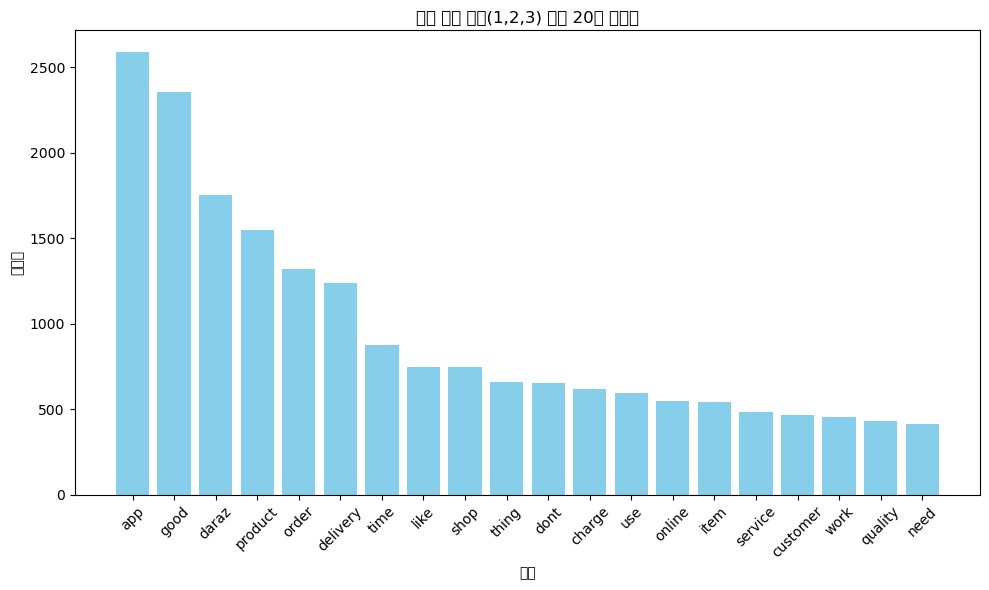

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


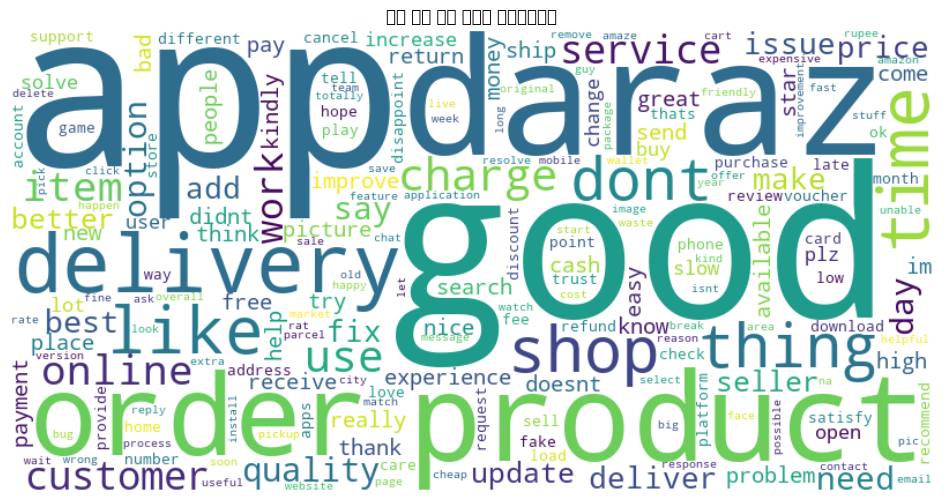

In [85]:
low_score_ids = low_score_reviews.index.unique()

low_score_contents = daraz2.loc[low_score_ids]

print(low_score_contents.head())

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

word_counts = X_low_score.sum(axis=0).A1  # Ìù¨ÏÜå ÌñâÎ†¨ÏùÑ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print("ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú:")
print(word_freq_df.head(20))

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('ÎπàÎèÑÏàò')
plt.xticks(rotation=45)
plt.title('ÎÇÆÏùÄ Î≥ÑÏ†ê Î¶¨Î∑∞(1,2,3) ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white')\
    .generate_from_frequencies(dict(zip(word_freq_df['word'], word_freq_df['frequency'])))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ÎÇÆÏùÄ Î≥ÑÏ†ê Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
plt.show()

In [121]:
low_score_reviews.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
16                      16             0.190633      1        0.000000   
18                      18             0.271400      3        0.200000   
27                      27             0.168471      3        0.285714   
29                      29             0.467150      3        0.000000   
33                      33             0.155600      2        0.000000   
...                    ...                  ...    ...             ...   
53926                53926             0.659700      2        0.000000   
53948                53948             0.361200      3        0.000000   
53971                53971             0.794700      2        0.000000   
53990                53990             0.421500      3        0.000000   
53993                53993             0.599400      1        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
16          0.666667      

In [87]:
## Í∏çÏ†ï Í∞êÏ†ï, ÎÇÆÏùÄ Î≥ÑÏ†ê ÌÜ†ÌîΩÎ™®Îç∏ÎßÅ 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

n_topics = 5  # ÌÜ†ÌîΩ Í∞úÏàò (ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï)
lda_model = LatentDirichletAllocation(n_components=n_topics, 
                                      max_iter=10, 
                                      learning_method='online',
                                      random_state=42)
lda_topics = lda_model.fit_transform(X_low_score)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: app work fix update daraz good use new like issue
Topic 1: order daraz customer app nice dont help say service place
Topic 2: good app shop online daraz product order best thing quality
Topic 3: good delivery product app charge daraz price like time order
Topic 4: option delivery cash payment add available satisfy pay product sell


Í∏çÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÇÆÏùÄ Í≤ÉÎì§ ---> Ïôú Í∑∏Îü¥Íπå? Ïñ¥Îñ§ ÏöîÏÜåÍ∞Ä Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏùÑÍπå

Ïù¥Í±∏ ÏúÑÌï¥ Ìï† Ïàò ÏûàÎäî Í≤É
1) Í∏çÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÇÆÏùÄ Î¶¨Î∑∞Îì§Ïùò Í∏çÏ†ï/Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¨∏Ïû•Ïùò ÎπÑÏú®ÏùÑ Î¥êÏïºÏßÄ. Ïù¥Í±¥ Ïù¥ÎØ∏ ÌôïÏù∏Ìïú ÏÇ¨ÏïàÏûÑ
--> Ïù¥Í±∏ ÏãúÍ∞ÅÌôîÌïòÎäî Î∞©Î≤ï!!

2) Í∑∏ Ï§ëÏóêÏÑú Î∂ÄÏ†ï Î¨∏Ïû•Îì§ÎßåÏùÑ ÎΩëÏïÑÏÑú, Í±∞Í∏∞ÏóêÏÑú Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî ÌÇ§ÏõåÎìúÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ©¥ Ï¢ãÍ≤†Îã§.
--> daraz, app Í≥º Í∞ôÏùÄ ÌëúÌòÑÏùÄ Ï†úÏô∏ÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌï† Ïàò ÏûàÏùÑÍπå? 

3) ÌÜ†ÌîΩ Î™®Îç∏ÎßÅÏùÑ Ìï¥ÎèÑ Ï¢ãÏùÑ Í±∞Ïïº!! 

=============================================================================================

Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Í≤ÉÎì§ --> Ïôú Í∑∏Îü¥Íπå? Ïñ¥Îñ§ ÏöîÏÜåÍ∞Ä Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥£ÏùÑÍπå

1)Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞Îì§Ïùò Î¨∏Ïû• Íµ¨ÏÑ± ÎπÑÏú®ÏùÑ Î≥º Í≤É
2) Í∑∏ Ï§ëÏóêÏÑú Í∏çÏ†ï, Ï§ëÎ¶Ω Î¨∏Ïû•ÏùÑ ÎΩëÏïÑÏÑú Í±∞Í∏∞ÏÑú Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî ÌÇ§Ïõå ÌôïÏù∏ & ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏßÑÌñâ 


#### ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ & ÌÇ§ÏõåÎìú Î∂ÑÏÑù

- Í∏çÏ†ï Î¶¨Î∑∞ : Pakistan..?  / delivery / charge / fast / order / work / need / service / quality / seller / item / money

- Ï§ëÎ¶Ω Î¶¨Î∑∞ : online / update / charge / delivery / seller / picture / fake 

- Î∂ÄÏ†ï Î¶¨Î∑∞ : deliver / return / cancel / delivery / seller / send / quality / money / time / poor / waste / service / low / fake / worst / online / price / new

  --> Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî delivery Î¨∏Ï†ú / quality Î¨∏Ï†ú / seller Î¨∏Ï†ú Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏùºÎã® ÏßëÏ§ëÌï¥ÏÑú ÌååÏïÖ
  --> Î∂ÄÏ†ïÎ¶¨Î∑∞, Ï§ëÎ¶ΩÎ¶¨Î∑∞ Î™®ÎëêÏóêÏÑú ÎÇòÌÉÄÎÇú fake Î¨∏Ï†úÎ•º ÌôïÏù∏ÌïòÍ∏∞

  Í∑∏ Ïô∏ÏóêÎèÑ update, cancel, return ÏôÄ Í∞ôÏùÄ Îã®Ïñ¥Í∞Ä Îì§Ïñ¥Í∞Ñ Î¶¨Î∑∞Îì§ÎèÑ ÌôïÏù∏ÌïòÍ∏∞.


## Í∏çÏ†ï Í∞êÏ†ïÏù∏Îç∞, ÎÇÆÏùÄ Î≥ÑÏ†ê --> Ìï¥Îãπ Î¶¨Î∑∞Ïùò negative Î¨∏Ïû•Îì§

In [101]:
low_score_reviews[['negative_ratio', 'neutral_ratio', 'positive_ratio']]

negative_ratio  neutral_ratio  positive_ratio
16           0.000000       0.666667        0.333333
18           0.200000       0.400000        0.400000
27           0.285714       0.142857        0.571429
29           0.000000       0.000000        1.000000
33           0.000000       0.600000        0.400000
...               ...            ...             ...
53926        0.000000       0.000000        1.000000
53948        0.000000       0.000000        1.000000
53971        0.000000       0.000000        1.000000
53990        0.000000       0.000000        1.000000
53993        0.000000       0.000000        1.000000

[6827 rows x 3 columns]

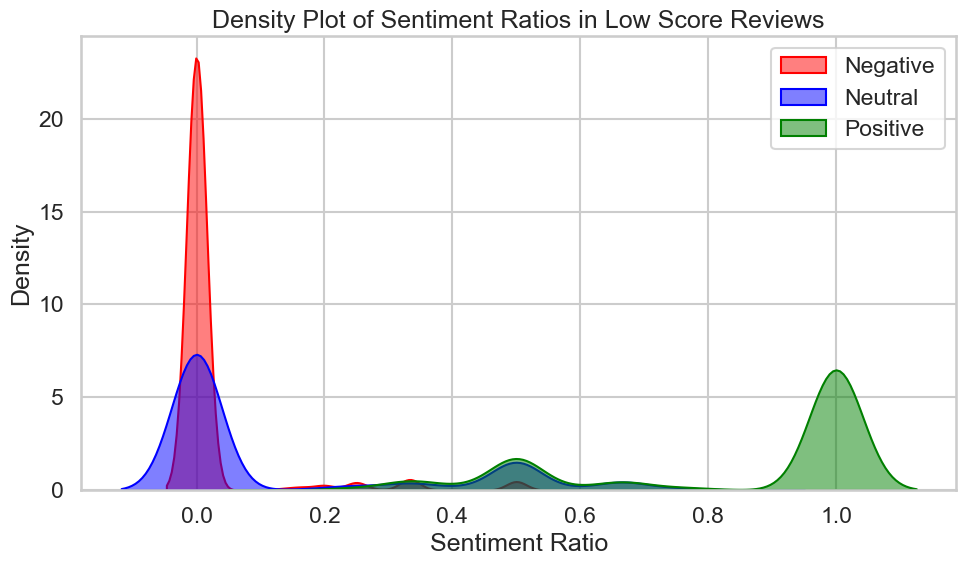

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï (RÏùò density plot ÎäêÎÇåÏùÑ ÏúÑÌï¥ ÍπîÎÅîÌïú Ïä§ÌÉÄÏùº)
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

# Í∞Å Í∞êÏÑ± ÎπÑÏú®Ïùò density plotÏùÑ Í∑∏Î¶ΩÎãàÎã§.
sns.kdeplot(low_score_reviews['negative_ratio'], 
            fill=True, 
            color='red', 
            alpha=0.5, 
            label='Negative')

sns.kdeplot(low_score_reviews['neutral_ratio'], 
            fill=True, 
            color='blue', 
            alpha=0.5, 
            label='Neutral')

sns.kdeplot(low_score_reviews['positive_ratio'], 
            fill=True, 
            color='green', 
            alpha=0.5, 
            label='Positive')

plt.xlabel('Sentiment Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Ratios in Low Score Reviews')
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
low_score_reviews2 = low_score_reviews.reset_index()

In [130]:
low_score_reviews2.head

<bound method NDFrame.head of       index  original_row_number  avg_sentiment_score  score  negative_ratio  \
0        16                   16             0.190633      1        0.000000   
1        18                   18             0.271400      3        0.200000   
2        27                   27             0.168471      3        0.285714   
3        29                   29             0.467150      3        0.000000   
4        33                   33             0.155600      2        0.000000   
...     ...                  ...                  ...    ...             ...   
6822  53926                53926             0.659700      2        0.000000   
6823  53948                53948             0.361200      3        0.000000   
6824  53971                53971             0.794700      2        0.000000   
6825  53990                53990             0.421500      3        0.000000   
6826  53993                53993             0.599400      1        0.000000   

      neu

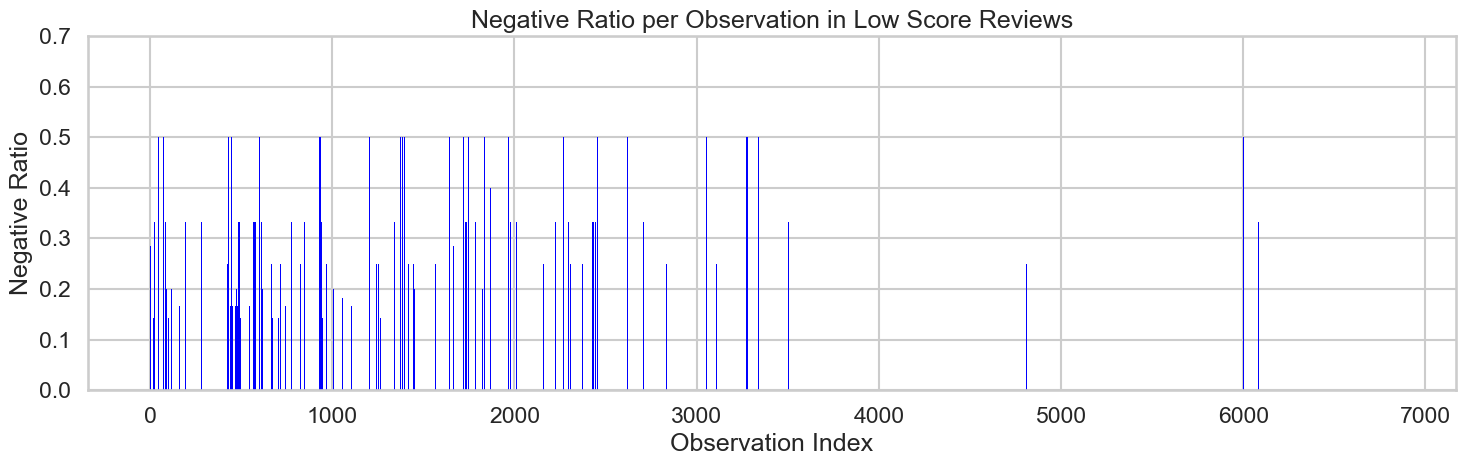

In [134]:
import matplotlib.pyplot as plt

#Í∏çÏ†ï Í∞êÏ†ïÏù∏Îç∞ low Î≥ÑÏ†êÏù∏ Í≤ΩÏö∞
plt.figure(figsize=(15, 5))
plt.bar(low_score_reviews2.index, low_score_reviews2['negative_ratio'], width=1.0, color='blue', edgecolor='none')
plt.xlabel('Observation Index')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio per Observation in Low Score Reviews')
plt.tight_layout()
plt.show()

Í∏çÏ†ï Í∞êÏ†ïÏù∏Îç∞ low Î≥ÑÏ†êÏù∏ Í≤ΩÏö∞Îäî ÍµâÏû•Ìûà Ïã†Í∏∞ÌïòÍ≤å Î∂ÄÏ†ïÏ†ÅÏù∏ Î¨∏Ïû•Ïùò ÎπÑÏú®Ïù¥ 0.5Î•º ÎÑòÏßÄ ÏïäÎäî Í≤ÉÏù¥ ÎåÄÎ∂ÄÎ∂Ñ

--> Í∑∏Î†áÎã§Î©¥ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ìï¥Îãπ Î¨∏Ïû•Îì§Ïùò ÏöîÏÜåÍ∞Ä ÏÇ¨Ïö©ÏûêÍ∞Ä ÎÇÆÏùÄ Î≥ÑÏ†êÏùÑ Ï£ºÍ≤å Îêú Ïù¥Ïú†ÏòÄÎã§Îäî Í≤É. 

---> ÌäπÌûà Î∂ÄÏ†ï Í∞êÏ†ïÏùò ÎπÑÏú®Ïù¥ 0.3 Ïù¥ÌïòÏù∏ Í≤ÉÎì§ÏùÄ Îçî ÌäπÎ≥ÑÌï¥ Î≥¥ÏûÑ --> Ìï¥Îãπ ÎÇ¥Ïö©Îì§ÏùÄ Îî∞Î°ú ÌôïÏù∏Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§Í≥† ÌåêÎã®Îê®. 

In [149]:
low_score_sentences.head()

original_row_number                                           sentence  \
98                    16  Whoever designed the current UI/UX should be s...   
99                    16  The button to search for a new product vanishe...   
100                   16  The app was already near perfect small changes...   
106                   18  I had a great experience with my first two ord...   
107                   18                    However, I'm now facing issues.   

     score                              preprocessed_sentence  
98       1       whoever design current uiux sack immediately  
99       1  button search new product vanish block clipart...  
100      1  app already near perfect small change couldve ...  
106      3  great experience first two order daraz appparc...  
107      3                              however im face issue

In [151]:
low_score_reviews.head()

original_row_number  avg_sentiment_score  score  negative_ratio  \
16                   16             0.190633      1        0.000000   
18                   18             0.271400      3        0.200000   
27                   27             0.168471      3        0.285714   
29                   29             0.467150      3        0.000000   
33                   33             0.155600      2        0.000000   

    neutral_ratio  positive_ratio sentiment_label  
16       0.666667        0.333333        Positive  
18       0.400000        0.400000        Positive  
27       0.142857        0.571429        Positive  
29       0.000000        1.000000        Positive  
33       0.600000        0.400000        Positive

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

##low_score_sentences = low_score_sentences.merge(
##    df_sentences[['original_row_number', 'sentiment_label']], 
##    on='original_row_number', 
##    how='left'
##)


selected_ids = low_score_reviews[low_score_reviews['negative_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences = low_score_sentences[low_score_sentences['original_row_number'].isin(selected_ids)]
negative_sentences = selected_sentences[selected_sentences['sentiment_label'] == 'Negative']

print("ÏÑ†ÌÉùÎêú Negative Î¨∏Ïû• Ïàò:", len(negative_sentences))

# ÌÇ§ÏõåÎìú Î∂ÑÏÑù
custom_stop_words = ['daraz', 'app']
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X_negative = vectorizer.fit_transform(negative_sentences['preprocessed_sentence'])

word_counts = X_negative.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print("ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:")
print(word_freq_df.head(20))

# ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ (LDA) ÏßÑÌñâ
n_topics = 5  
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics = lda_model.fit_transform(X_negative)

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()

print("\nLDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:")
display_topics(lda_model, feature_names, no_top_words)

ÏÑ†ÌÉùÎêú Negative Î¨∏Ïû• Ïàò: 61206
ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:
          word  frequency
1141   product       6852
625        get       4361
1035     order       4151
637       good       4060
380   delivery       4022
336   customer       3746
1099    please       3373
1291       say       3103
439       dont       2789
1335      shop       2672
1023    online       2600
234     charge       2527
1564       use       2507
1310    seller       2406
1494     thing       2229
860       like       2208
1257    return       2080
790      issue       1971
1070       pay       1813
792       item       1756

LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:
Topic 0: customer, say, return, thing, issue, good, item, product, support, order
Topic 1: charge, pay, delivery, increase, product, least, still, order, shop, online
Topic 2: good, shop, online, please, use, need, fix, also, update, money
Topic 3: product, seller, order, delivery, get, please, keep, look, dont, even
Topic 4: product, get, please, sale, 

1. topic0
   - customer, return, suppor : Î∞òÌíàÏù¥ÎÇò ÏßÄÏõê Í¥ÄÎ†® Ïù¥ÏäàÎì§Ïù¥ ÎÇòÏò¥. Í≥†Í∞ù ÏÑúÎπÑÏä§ÎÇò Î∞òÌíà Ï≤òÎ¶¨ Í≥ºÏ†ïÏóêÏÑúÏùò Î¨∏Ï†úÏ†êÏùº Í∞ÄÎä•ÏÑ± ÎÜíÏùå
  
2. topic1
    - delibery, online, increase, charge : Ïò®ÎùºÏù∏ Ï£ºÎ¨∏(Î∞∞ÏÜ°ÎπÑ Ï∂îÍ∞Ä)Í≥º ÏáºÌïë Ïãú Í∞ÄÍ≤© Î∂ÄÎã¥Ïù¥ÎÇò Ï∂îÍ∞Ä ÎπÑÏö©Ïóê ÎåÄÌïú Î∂àÎßåÏù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

3. topic2
    - Ï¢ãÏùÄ Ï†êÍ≥º Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌïú Ï†êÎì§ÏùÑ Ìï®Íªò Ïñ∏Í∏âÌïòÍ≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ
      
4. topic3
    - seller, delibery, order : ÌåêÎß§ÏûêÎÇò Î∞∞ÏÜ° ÏÑúÎπÑÏä§Ïóê ÎåÄÌï¥ Î∂àÎßåÏ°± ÌïòÎäî Í≤ΩÏö∞


ÎåÄÎûµ Ïù¥ Ï†ïÎèÑÎ°ú Î≥¥ÏûÑ
--> Î∞òÌíà Í¥ÄÎ†®(return) / Ïò®ÎùºÏù∏ Ï£ºÎ¨∏ + Î∞∞ÏÜ° Î¨∏Ï†ú(online, delivery, charge) / Í∞ÄÍ≤© Ïù∏ÏÉÅ(increase) / ÌåêÎß§Ïûê Í¥ÄÎ†® (seller)
Ïù¥ Îã®Ïñ¥Îì§ÏùÑ Ìè¨Ìï®Ìïú Îã®Ïñ¥Îì§ÏùÑ ÌôïÏù∏

In [170]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Í∏¥ Î¨∏ÏûêÏó¥ Ï†ÑÏ≤¥ Ï∂úÎ†•

keywords = ["return", "support", "delivery", "online", "charge", "increase", "seller"]

pattern = "|".join(keywords)

filtered_reviews = daraz2[daraz2['content'].str.contains(pattern, case=False, na=False)]


print("ÌïÑÌÑ∞ÎßÅÎêú Î¶¨Î∑∞ ÏòàÏãú:")
print(filtered_reviews['content'].head(10))

ÌïÑÌÑ∞ÎßÅÎêú Î¶¨Î∑∞ ÏòàÏãú:
0                                                                                                                                                                          app bombard ad make feel cheap fraudulent website really lose class charge cash delivery tap frustrate want useless prop customer service whole
3                                                                                                                                                   much ad notification option disable device system set app include delivery chat message store annoy hell daraz fix dont offer something ill open know deal ever minute
6                                                                       overload ad daraz instal try suppose discount order app sham amount notification get turn personal phone machine mention poor service deliver feel like sometimes u pay never refund either followup call several hour wisdom always cash delivery
8     ive great experience 

### ÏúÑÏùò Í≤∞Í≥º Ìï¥ÏÑù
1. Í≥ºÎèÑÌïú Í¥ëÍ≥†ÏôÄ ÏïåÎ¶º
2. Î∞∞ÏÜ°Í≥º Î∞òÌíà Í≥ºÏ†ïÏóêÏÑú ÏãúÍ∞ÑÏßÄÏó∞, ÌôòÎ∂à Ïã§Ìå® Îì±Ïùò Î¨∏Ï†úÍ∞Ä Î∞úÏÉù
3. ÏóÖÎç∞Ïù¥Ìä∏ ÌñàÎäîÎç∞ Í∏∞Îä• Ï†ÄÌïò, ÏÇ¨Ïö©ÏÑ± Ï†ÄÌïò
4. Í∞ÄÍ≤© ÏÉÅÏäπ Î∞è Ìï†Ïù∏ ÌòúÌÉù Ï§ÑÏñ¥Îì¶
5. Ï†úÌíà ÌíàÏßà, ÌåêÎß§Ïûê Ïã†Î¢∞ÎèÑ ÌïòÎùΩ

--> ad / delivery, return / update / increase / seller, quality Îã®Ïñ¥ Ï§ëÏã¨ÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå 

### Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Í≤ÉÎì§ --> Ïôú Í∑∏Îü¥Íπå? Ïñ¥Îñ§ ÏöîÏÜåÍ∞Ä Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥£ÏùÑÍπå

1)Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞ Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞Îì§Ïùò Î¨∏Ïû• Íµ¨ÏÑ± ÎπÑÏú®ÏùÑ Î≥º Í≤É 2) Í∑∏ Ï§ëÏóêÏÑú Í∏çÏ†ï, Ï§ëÎ¶Ω Î¨∏Ïû•ÏùÑ ÎΩëÏïÑÏÑú Í±∞Í∏∞ÏÑú Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî ÌÇ§Ïõå ÌôïÏù∏ & ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏßÑÌñâ

In [173]:
high_score_sentences

original_row_number  \
500                    111   
501                    111   
502                    111   
503                    111   
504                    111   
...                    ...   
95994                53388   
96033                53422   
96038                53426   
96332                53685   
96612                53924   

                                                                                                            sentence  \
500                                                                                 Daraz has become very bad now üò¢.   
501                                          Searching for a product gives 1/2 the products related to that searchüôÅ.   
502                                                                                          Delivery fee is extraü´§.   
503                                                                 Can't easily talk to an agent with any problemüò¢.   
504                                                                  It has become difficult to find good products.ü•∫   
...                                                                                                              ...   
95994                                                                                      Lagging, delayed services   
96033                                                                      Its nice but everything is a scam üòï üòí üò™ üòî   
96038                                                                               Some time good and some time bad   
96332                                                                                          Low price all product   
96612  It's a largest online shopping mall, Products of all categories are available as per the demand of the people   

       score  \
500        4   
501        4   
502        4   
503        4   
504        4   
...      ...   
95994      4   
96033      4   
96038      4   
96332      5   
96612      5   

                                                       preprocessed_sentence  
500                                                         daraz become bad  
501                                               search product give relate  
502                                                       delivery fee extra  
503                                           cant easily talk agent problem  
504                                       become difficult find good product  
...                                                                      ...  
95994                                                      lag delay service  
96033                                                   nice everything scam  
96038                                                          time good bad  
96332                                                      low price product  
96612  largest online shop mall product category available per demand people  

[1734 rows x 4 columns]

In [184]:
high_score_reviews

original_row_number  avg_sentiment_score  score  negative_ratio  \
111                    111            -0.203320      4            0.40   
134                    134            -0.213520      4            0.40   
167                    167            -0.193750      5            0.50   
224                    224            -0.168950      4            0.50   
238                    238            -0.398225      4            0.75   
...                    ...                  ...    ...             ...   
53388                53388            -0.571900      4            1.00   
53422                53422            -0.226300      4            1.00   
53426                53426            -0.153100      4            1.00   
53685                53685            -0.273200      5            1.00   
53924                53924            -0.128000      5            1.00   

       neutral_ratio  positive_ratio sentiment_label  
111             0.40             0.2        Negative  
134             0.60             0.0        Negative  
167             0.50             0.0        Negative  
224             0.00             0.5        Negative  
238             0.25             0.0        Negative  
...              ...             ...             ...  
53388           0.00             0.0        Negative  
53422           0.00             0.0        Negative  
53426           0.00             0.0        Negative  
53685           0.00             0.0        Negative  
53924           0.00             0.0        Negative  

[1104 rows x 7 columns]

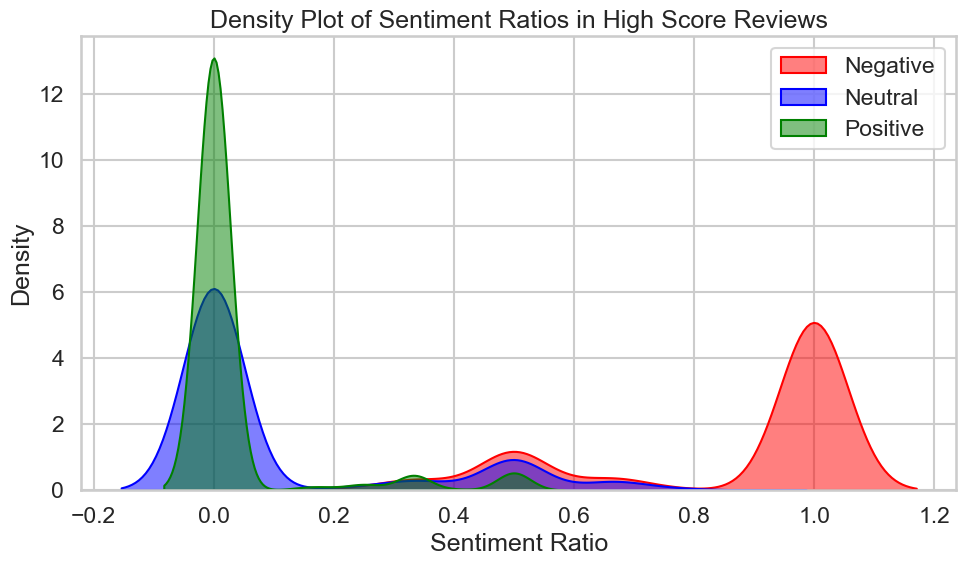

In [186]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

sns.kdeplot(high_score_reviews['negative_ratio'], 
            fill=True, 
            color='red', 
            alpha=0.5, 
            label='Negative')

sns.kdeplot(high_score_reviews['neutral_ratio'], 
            fill=True, 
            color='blue', 
            alpha=0.5, 
            label='Neutral')

sns.kdeplot(high_score_reviews['positive_ratio'], 
            fill=True, 
            color='green', 
            alpha=0.5, 
            label='Positive')

plt.xlabel('Sentiment Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Ratios in High Score Reviews')
plt.legend()
plt.tight_layout()
plt.show()


In [188]:
high_score_reviews2 = high_score_reviews.reset_index()
high_score_reviews2.head


<bound method NDFrame.head of       index  original_row_number  avg_sentiment_score  score  negative_ratio  \
0       111                  111            -0.203320      4            0.40   
1       134                  134            -0.213520      4            0.40   
2       167                  167            -0.193750      5            0.50   
3       224                  224            -0.168950      4            0.50   
4       238                  238            -0.398225      4            0.75   
...     ...                  ...                  ...    ...             ...   
1099  53388                53388            -0.571900      4            1.00   
1100  53422                53422            -0.226300      4            1.00   
1101  53426                53426            -0.153100      4            1.00   
1102  53685                53685            -0.273200      5            1.00   
1103  53924                53924            -0.128000      5            1.00   

      neu

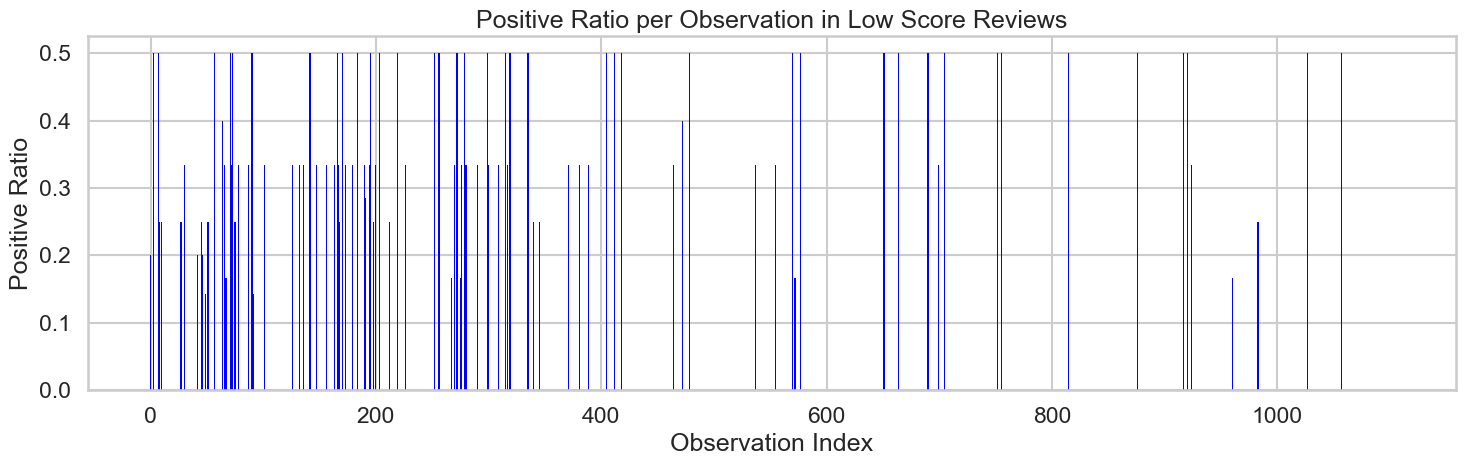

In [190]:
import matplotlib.pyplot as plt

#Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞ High Î≥ÑÏ†êÏù∏ Í≤ΩÏö∞
plt.figure(figsize=(15, 5))
plt.bar(high_score_reviews2.index, high_score_reviews2['positive_ratio'], width=1.0, color='blue', edgecolor='none')
plt.xlabel('Observation Index')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio per Observation in Low Score Reviews')
plt.tight_layout()
plt.show()

In [192]:
high_score_sentences.head()
high_score_reviews.head()

original_row_number  avg_sentiment_score  score  negative_ratio  \
111                  111            -0.203320      4            0.40   
134                  134            -0.213520      4            0.40   
167                  167            -0.193750      5            0.50   
224                  224            -0.168950      4            0.50   
238                  238            -0.398225      4            0.75   

     neutral_ratio  positive_ratio sentiment_label  
111           0.40             0.2        Negative  
134           0.60             0.0        Negative  
167           0.50             0.0        Negative  
224           0.00             0.5        Negative  
238           0.25             0.0        Negative

## Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞, ÎÜíÏùÄ Î≥ÑÏ†ê --> Ìï¥Îãπ Î¶¨Î∑∞Ïùò negative Î¨∏Ïû•Îì§

In [194]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

high_score_sentences = high_score_sentences.merge(
    df_sentences[['original_row_number', 'sentiment_label']], 
    on='original_row_number', 
    how='left'
)


selected_ids2 = high_score_reviews[high_score_reviews['positive_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences2 = high_score_sentences[high_score_sentences['original_row_number'].isin(selected_ids2)]
negative_sentences2 = selected_sentences2[selected_sentences2['sentiment_label'] == 'Negative']

print("ÏÑ†ÌÉùÎêú Negative Î¨∏Ïû• Ïàò:", len(negative_sentences2))

# ÌÇ§ÏõåÎìú Î∂ÑÏÑù
custom_stop_words = ['daraz', 'app']
vectorizer2 = CountVectorizer(stop_words=custom_stop_words)
X_negative2 = vectorizer2.fit_transform(negative_sentences2['preprocessed_sentence'])

word_counts2 = X_negative2.sum(axis=0).A1
vocab2 = vectorizer2.get_feature_names_out()

word_freq_df2 = pd.DataFrame({'word': vocab2, 'frequency': word_counts2})
word_freq_df2 = word_freq_df2.sort_values(by='frequency', ascending=False)

print("ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:")
print(word_freq_df2.head(20))

# ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ (LDA) ÏßÑÌñâ
n_topics = 5  
lda_model2 = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics2 = lda_model2.fit_transform(X_negative2)

no_top_words = 10
feature_names2 = vectorizer2.get_feature_names_out()

print("\nLDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:")
display_topics(lda_model2, feature_names2, no_top_words)


ÏÑ†ÌÉùÎêú Negative Î¨∏Ïû• Ïàò: 2178
ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:
           word  frequency
1601    product        368
1425      order        330
195         bad        281
874        good        236
545    delivery        208
1830     seller        188
2086       time        179
1590    problem        178
758        fake        141
2062      thing        136
1093       item        129
864         get        129
1865       shop        125
1846    service        114
1411     online         98
2183        use         96
2306      wrong         94
1928  sometimes         93
627        dont         91
1645    quality         88

LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:
Topic 0: good, product, thing, quality, service, bad, sometimes, delivery, time, seller
Topic 1: product, bad, experience, wrong, item, send, delivery, order, fake, use
Topic 2: bad, product, good, shop, order, seller, fake, online, time, dont
Topic 3: problem, order, show, delivery, fix, option, say, disappoint, error, place
Topic 4:

## Î∂ÄÏ†ï Í∞êÏ†ïÏù∏Îç∞, ÎÜíÏùÄ Î≥ÑÏ†ê --> Ìï¥Îãπ Î¶¨Î∑∞Ïùò positive Î¨∏Ïû•Îì§

In [198]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

selected_ids2 = high_score_reviews[high_score_reviews['positive_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences2 = high_score_sentences[high_score_sentences['original_row_number'].isin(selected_ids2)]
positive_sentences3 = selected_sentences2[selected_sentences2['sentiment_label'] == 'Positive']

print("ÏÑ†ÌÉùÎêú Positive Î¨∏Ïû• Ïàò:", len(positive_sentences3))

# ÌÇ§ÏõåÎìú Î∂ÑÏÑù
custom_stop_words = ['daraz', 'app']
vectorizer3 = CountVectorizer(stop_words=custom_stop_words)
X_positive3 = vectorizer3.fit_transform(positive_sentences3['preprocessed_sentence'])

word_counts3 = X_positive3.sum(axis=0).A1
vocab3 = vectorizer3.get_feature_names_out()

word_freq_df3 = pd.DataFrame({'word': vocab3, 'frequency': word_counts3})
word_freq_df3 = word_freq_df3.sort_values(by='frequency', ascending=False)

print("ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:")
print(word_freq_df3.head(20))

# ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ (LDA) ÏßÑÌñâ
n_topics = 5  
lda_model3 = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics3 = lda_model3.fit_transform(X_positive3)

no_top_words = 10
feature_names3 = vectorizer3.get_feature_names_out()

print("\nLDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:")
display_topics(lda_model3, feature_names3, no_top_words)

ÏÑ†ÌÉùÎêú Positive Î¨∏Ïû• Ïàò: 133
ÌÇ§ÏõåÎìú Î∂ÑÏÑù ÏÉÅÏúÑ 20Í∞ú:
           word  frequency
267      return         12
202       order         12
236     product         11
25          bad         10
49     complain          8
275        send          8
248      really          8
274      seller          8
282        shop          7
121         get          7
24         back          7
64     customer          7
278     service          7
101  experience          7
269         say          6
75     delivery          6
37         cant          6
330         use          6
249     receive          5
192       never          5

LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º:
Topic 0: send, seller, dress, order, complain, problem, parcel, email, wrong, bad
Topic 1: get, complain, seller, product, difficult, need, soon, worst, fix, service
Topic 2: return, bad, experience, really, lose, shop, money, service, back, star
Topic 3: product, order, delivery, say, return, take, issue, still, cant, item
Topic 4: us

#### Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞ÏóêÏÑú Ï∂îÏ∂úÌïú Î∂ÄÏ†ï Î¨∏Ïû•

##### ÌÇ§ÏõåÎìú Î∂ÑÏÑù Í≤∞Í≥º
1. ÏÉÅÏúÑ ÎπàÎèÑ Îã®Ïñ¥Î°ú product, order, bad, delivery, seller, problem, fake
2. Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï£ºÎ¨∏ Ï≤òÎ¶¨, Î∞∞ÏÜ°, Ï†úÌíàÏùò fake Ïó¨Î∂ÄÎÇò ÌíàÏßà, ÌåêÎß§ÏûêÎÇò Í≥†Í∞ù ÏÑúÎπÑÏä§ÏôÄ Í¥ÄÎ†®Îêú Î¨∏Ï†úÎì§Ïù¥ Î∂ÄÏ†ï Î¨∏Ïû•ÏóêÏÑú ÏûêÏ£º Ïñ∏Í∏â


##### ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º

1. Topic 0:  Ï†úÌíàÏùò ÏßàÍ≥º ÏÑúÎπÑÏä§Ïóê ÎåÄÌï¥ Í∏çÏ†ïÏ†Å ÏöîÏÜå(good, quality, service)ÏôÄ ÎèôÏãúÏóê Î∂ÄÏ†ïÏ†Å Î¨∏Ï†ú(bad, delivery, time, seller)Í∞Ä ÌòºÏû¨Îê® 
2. Topic 1:  Ï£ºÎ¨∏ Î∞è Î∞∞ÏÜ° Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌïòÎäî Î¨∏Ï†ú / ÏûòÎ™ªÎêú Ï†úÌíà Î∞∞ÏÜ°Ïù¥ÎÇò Ï†úÌíàÏùò ÏßÑÌíà Ïó¨Î∂ÄÏóê ÎåÄÌïú ÏùòÏã¨(wrong, fake)
3. Topic 2:  Ïò®ÎùºÏù∏ ÏáºÌïëÍ≥º Í¥ÄÎ†®Ìï¥ Ï£ºÎ¨∏ Î∞è ÌåêÎß§ÏûêÏóê ÎåÄÌïú Î∂àÏã† / Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î∂ÄÏ†ïÏ†Å ÌèâÍ∞Ä(bad, dont)
4. Topic 3: Ï£ºÎ¨∏ Ï≤òÎ¶¨ Î∞è Î∞∞ÏÜ° Í≥ºÏ†ïÏóêÏÑúÏùò Î¨∏Ï†ú / Ïò§Î•òÎÇò Í≥†Í∞ùÏùò Ïã§Îßù(disappoint, error)Ïóê Ï¥àÏ†ê
5. Topic 4:  Ï£ºÎ¨∏ Ï∑®ÏÜå Î∞è Î∞òÌíà / Í≥†Í∞ù ÏÑúÎπÑÏä§ÏôÄ Í¥ÄÎ†®Îêú Î∂àÎßå

   
#### Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏãúÏÇ¨Ï†ê

Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†, Î∂ÄÏ†ï Î¨∏Ïû•ÏóêÏÑúÎäî Ï£ºÎ¨∏, Î∞∞ÏÜ°, Ï†úÌíà ÏßÑÏúÑ, Í≥†Í∞ù ÏÑúÎπÑÏä§ Îì± Íµ¨Ï≤¥Ï†ÅÏù∏ Î¨∏Ï†úÎì§Ïù¥ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ïñ∏Í∏âÎê®.
Ï†ÑÎ∞òÏ†ÅÏúºÎ°úÎäî ÎßåÏ°±Ïä§Îü¨Ïö¥ Í≤ΩÌóòÏùÑ ÌñàÎã§Í≥† ÌèâÍ∞ÄÌïòÎ©¥ÏÑúÎèÑ, ÌäπÏ†ï Í≥ºÏ†ï(Î∞∞ÏÜ° ÏßÄÏó∞, ÏûòÎ™ªÎêú Ï†úÌíà ÏàòÎ†π, Î∞òÌíà/ÌôòÎ∂à Ï≤òÎ¶¨ Îì±)ÏóêÏÑú Î∂àÎßåÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå
Ïù¥Îü∞ Î∂àÏùºÏπòÎäî Í∏çÏ†ïÏ†Å ÏöîÏÜå(Ï†úÌíà Îã§ÏñëÏÑ±, Ïï±Ïùò ÏÇ¨Ïö© Ìé∏ÏùòÏÑ± Îì±)ÏôÄ Î∂ÄÏ†ïÏ†Å ÏöîÏÜå(Íµ¨Ï≤¥Ï†ÅÏù∏ Î¨∏Ï†ú ÏÉÅÌô©)Í∞Ä Ìï®Íªò Ï°¥Ïû¨Ìï®ÏúºÎ°úÏç® Î∞úÏÉù

#### Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞ÏóêÏÑú Ï∂îÏ∂úÌïú Í∏çÏ†ï Î¨∏Ïû• 

1. ÌÇ§ÏõåÎìú Î∂ÑÏÑù Í≤∞Í≥º

Ï£ºÏöî Îã®Ïñ¥:
retur order product bad complain send seller delivery : Ï£ºÎ¨∏ Ï≤òÎ¶¨, Ï†úÌíà ÏÉÅÌÉú, Î∞òÌíà Î∞è Î∞∞ÏÜ° Í≥ºÏ†ï, Í∑∏Î¶¨Í≥† ÌåêÎß§ÏûêÎÇò Í≥†Í∞ù ÏÑúÎπÑÏä§Ïóê Î¨∏Ï†úÍ∞Ä ÏûàÏùå

Í∏çÏ†ï Îã®Ïñ¥ÏôÄ Î∂ÄÏ†ï Îã®Ïñ¥Ïùò ÌòºÏû¨:
complain bad return Î∂ÄÏ†ïÏ†ÅÏù∏ Îã®Ïñ¥Îì§Ïù¥ ÎÜíÏùÄ ÎπàÎèÑÎ°ú Îì±Ïû• -->  customer service experience Îã®Ïñ¥ Îì±Ïû•
Ï†ÑÎ∞òÏ†ÅÏúºÎ°úÎäî ÎÜíÏùÄ Î≥ÑÏ†êÏùÑ Ï£ºÎ©¥ÏÑúÎèÑ, ÌäπÏ†ï ÌîÑÎ°úÏÑ∏Ïä§ÎÇò ÏÑúÎπÑÏä§ Îã®Í≥ÑÏóêÏÑú Î¨∏Ï†úÎ•º Í≤ΩÌóòÌï®ÏùÑ Î≥¥Ïó¨Ï§å

2. ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ 
    1) Topic 0: send, seller, dress, order, complain, problem, parcel, email, wrong, bad
       - Î∞∞ÏÜ° Í≥ºÏ†ïÍ≥º Í¥ÄÎ†®Îêú Î¨∏Ï†ú(ÏûòÎ™ªÎêú Ï£ºÎ¨∏, Î∂àÎßå, Î¨∏Ï†ú Î∞úÏÉù), ÌåêÎß§ÏûêÏôÄ Í¥ÄÎ†®Ìïú Ïù¥Ïäà Î≥¥ÏûÑ.
       - "dress"ÎùºÎäî Îã®Ïñ¥Îäî ÌäπÏ†ï Ï†úÌíà(ÏùòÎ•ò Îì±)Î•º ÏùòÎØ∏ÌïòÍ±∞ÎÇò, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï£ºÎ¨∏/Î∞∞ÏÜ° Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïò§Î•ò Í¥ÄÎ†® ÌÜ†ÌîΩÏùº Ïàò ÏûàÏùå. 


    2) Topic 1: get, complain, seller, product, difficult, need, soon, worst, fix, service
       - Ï†úÌíàÏùÑ Î∞õÎäî Í≥ºÏ†ïÏóêÏÑúÏùò Ïñ¥Î†§ÏõÄ, ÌåêÎß§ÏûêÏôÄ ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Î∂àÎßå

    3) Topic 2: return, bad, experience, really, lose, shop, money, service, back, star
       - Î∞òÌíà(return) Î∞è Íµ¨Îß§ Í≤ΩÌóòÏóê ÎåÄÌïú Î∂àÎßå. Ï†úÌíà Íµ¨Îß§ ÌõÑ ÌôòÎ∂àÏù¥ÎÇò Ïû¨Íµ¨Îß§ Í≥ºÏ†ïÏóêÏÑúÏùò Î¨∏Ï†ú, Í∑∏Î¶¨Í≥† Îèà Î¨∏Ï†ú Îì±Ïù¥ Ïñ∏Í∏â

    5)  Topic 3: product, order, delivery, say, return, take, issue, still, cant, item
        - Ï†úÌíà Ï£ºÎ¨∏ Î∞è Î∞∞ÏÜ°Í≥º Í¥ÄÎ†®Îêú Ïù¥Ïäà.

    5) Topic 4: use, chat, help, customer, also, love, time, provide, due, recently
       - Ïù¥ ÌÜ†ÌîΩÏùÄ ÎπÑÍµêÏ†Å Í∏çÏ†ïÏ†ÅÏù∏ ÏöîÏÜå & ÏÇ¨Ïö© Î∞è Í≥†Í∞ù ÏßÄÏõê Ï∏°Î©¥Ïùò Î¨∏Ï†úÍ∞Ä Ïñ∏Í∏â

3. Í≤∞Î°†
Î™®ÏàúÎêú Í≥†Í∞ù Í≤ΩÌóò:
Î≥ÑÏ†êÏù¥ ÎÜíÏùÄ Î¶¨Î∑∞ÏóêÏÑúÎèÑ Í≥†Í∞ùÎì§ÏùÄ Ï£ºÎ¨∏, Î∞∞ÏÜ°, Î∞òÌíà, ÌåêÎß§Ïûê Î∞è Í≥†Í∞ù ÏßÄÏõêÍ≥º Í¥ÄÎ†®Îêú Ïó¨Îü¨ Î¨∏Ï†úÏ†êÏùÑ Í≤ΩÌóò.

ÌòºÏû¨Îêú ÌîºÎìúÎ∞±:
Î¶¨Î∑∞ ÎÇ¥Ïóê Í∏çÏ†ïÏ†ÅÏù∏ ÌèâÍ∞ÄÏôÄ Î∂ÄÏ†ïÏ†ÅÏù∏ Î∂àÎßåÏù¥ ÎèôÏãúÏóê ÎÇòÌÉÄÎÇúÎã§Îäî Í≤ÉÏùÄ Í≥†Í∞ùÎì§Ïù¥ Ïó¨Îü¨ ÏöîÏÜåÎ•º Ï¢ÖÌï©Ìï¥ ÎÜíÏùÄ Ï†êÏàòÎ•º Ï£ºÏóàÏúºÎÇò ÏÑ∏Î∂ÄÏ†ÅÏúºÎ°úÎäî Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÏù¥ ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï®

Ïã§Ï†ú Í∞úÏÑ† ÌïÑÏöî ÏòÅÏó≠:
Î∞∞ÏÜ° Í≥ºÏ†ï, Î∞òÌíà Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§, ÌåêÎß§Ïûê Î∞è Í≥†Í∞ù ÏßÄÏõê Î¨∏Ï†ú Îì±Ïù¥ Í∞úÏÑ† ÎåÄÏÉÅÏûÑÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞, Ïù¥Îü¨Ìïú Î¨∏Ï†úÎì§Ïù¥ Í≥†Í∞ù ÎßåÏ°±ÎèÑÏóê Ïñ¥Îäê Ï†ïÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ± ÌÅº


### Í≤∞Î°† 

1. Î∞∞ÏÜ° Î∞è Î∞òÌíà, ÌôòÎ∂à Í≥ºÏ†ïÏóêÏÑúÏùò Î¨∏Ï†úÏ†ê   "delivery" / "return" / "return"
2. ÌåêÎß§Ïûê ÏßÑÏúÑ Ïó¨Î∂Ä, Ï†úÌíàÏùò ÌÄÑÎ¶¨Ìã∞ÏôÄ Í¥ÄÎ†®Ìïú Î¨∏Ï†úÏ†ê   "fake" / "seller" / "quality"
3. Í≥†Í∞ùÏÑúÎπÑÏä§ Í¥ÄÎ†® Î¨∏Ï†ú    "service"

   - Ïù¥ Ï†ïÎèÑÎ•º Í≥µÌÜµÏ†ÅÏù∏ Î¨∏Ï†úÏ†êÏúºÎ°ú ÍºΩÏùÑ Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ. Ïù¥ Îã®Ïñ¥Îì§ÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïòÎ©¥ Ï¢ãÏùÑ ÎìØ! 